# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">
## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

#### Common import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [4]:
# Generating normally distributed data and creating a DataFrame
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),   # Mean 0, Standard Deviation 2
    'x2': np.random.normal(5, 3, 10000),    # Mean 5, Standard Deviation 3
    'x3': np.random.normal(-5, 5, 10000)    # Mean -5, Standard Deviation 5
})
#The resulting DataFrame df will have 10,000 rows and 3 columns (x1, x2, x3),
# where each column represents data points generated from a different normal distribution with specified mean and standard deviation values.

<Axes: ylabel='Density'>

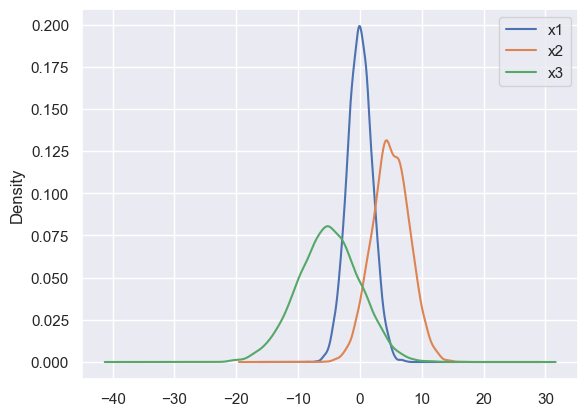

In [5]:
# plotting data

df.plot.kde()

In [7]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
standardscaler = StandardScaler()


In [8]:
# Fit the StandardScaler to the data and transform it
data_tf = standardscaler.fit_transform(df)

In [9]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

<h3>my Notes: tires to bring data of diffent scale to same scale </h3>

<Axes: ylabel='Density'>

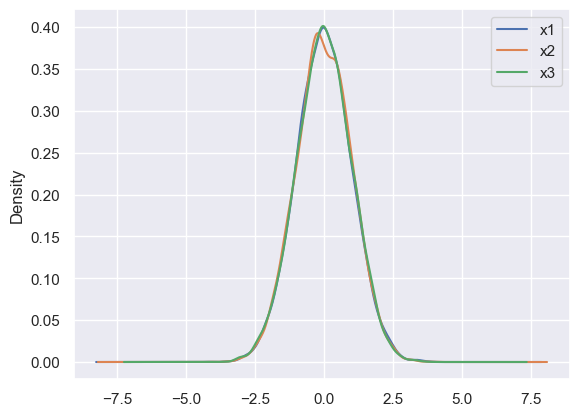

In [10]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [11]:
# Generate data and create the DataFrame
df = pd.DataFrame({
    # Generate 1000 samples from a positively skewed chi-squared distribution with 8 degrees of freedom
    'x1': np.random.chisquare(8, 1000),

    # Generate 1000 samples from a negatively skewed beta distribution with parameters alpha=8 and beta=2,
    # then scale the values by 40 to adjust the distribution
    'x2': np.random.beta(8, 2, 1000) * 40,

    # Generate 1000 samples from a symmetric normal (Gaussian) distribution with mean 50 and standard deviation 3
    'x3': np.random.normal(50, 3, 1000)
})

<Axes: ylabel='Density'>

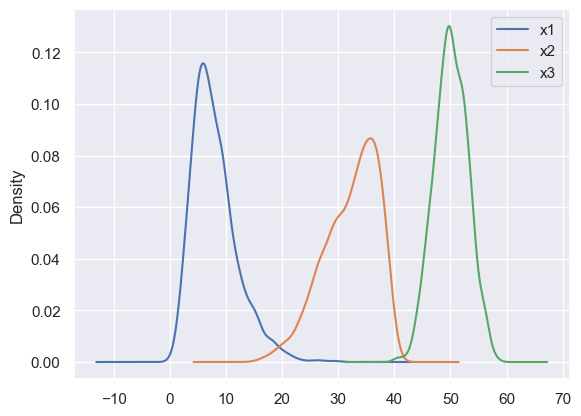

In [12]:
df.plot.kde()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

<Axes: ylabel='Density'>

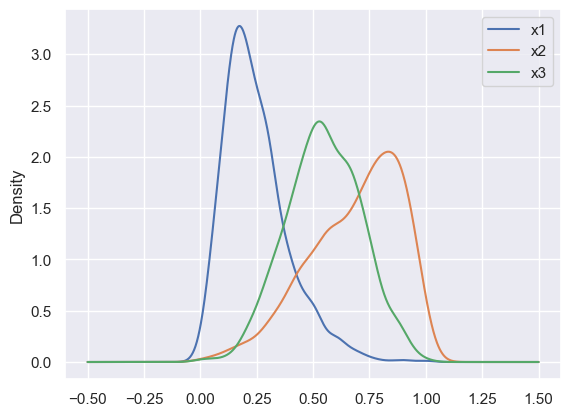

In [15]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [16]:
# Generate data and create the DataFrame
df = pd.DataFrame({
    # Simulate a distribution with lower outliers
    # Generate 1000 samples from a normal distribution with mean 20 and standard deviation 1,
    # and then concatenate it with 25 samples from a normal distribution with mean 1 and standard deviation 1.
    # Resulting in a distribution with lower outliers, where some values are significantly smaller than the majority.
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),

    # Simulate a distribution with higher outliers
    # Generate 1000 samples from a normal distribution with mean 30 and standard deviation 1,
    # and then concatenate it with 25 samples from a normal distribution with mean 50 and standard deviation 1.
    # Resulting in a distribution with higher outliers, where some values are significantly larger than the majority.
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})


<Axes: ylabel='Density'>

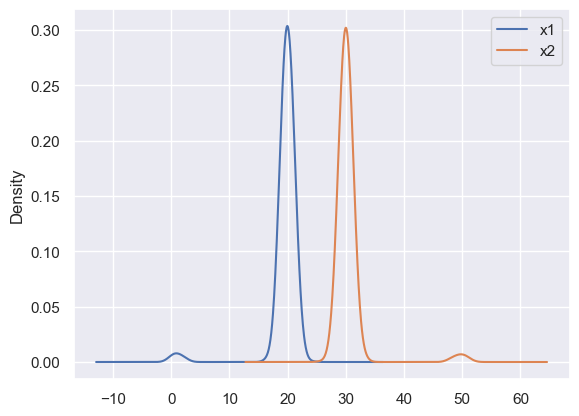

In [18]:
# Generate kernel density plots for each column in the DataFrame
df.plot.kde()

In [19]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [20]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

<Axes: ylabel='Density'>

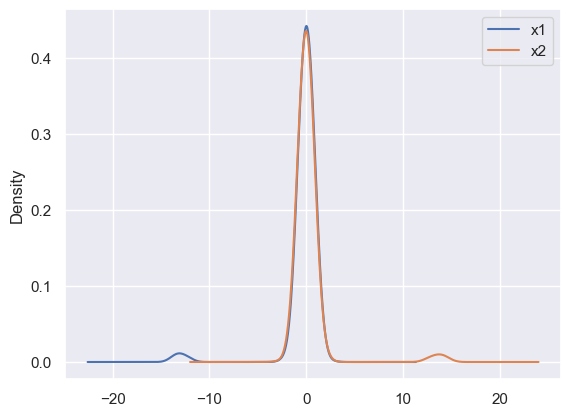

In [21]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [24]:
df = pd.DataFrame({
    # Generate 1000 random integer values between -100 and 100, and convert them to float
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    
    # Generate 1000 random integer values between -80 and 80, and convert them to float
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    
    # Generate 1000 random integer values between -150 and 150, and convert them to float
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

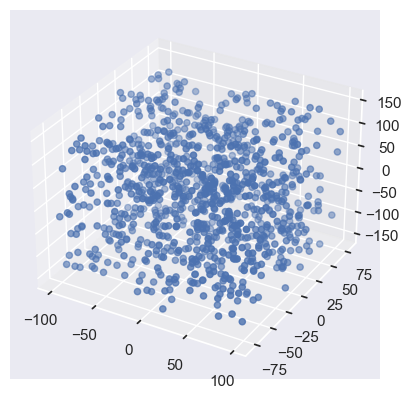

In [25]:
# Create a new figure and 3D axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create a 3D scatter plot using data from the DataFrame columns
ax.scatter3D(df.x1, df.y1, df.z1)

In [26]:
from sklearn.preprocessing import Normalizer

In [27]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [28]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

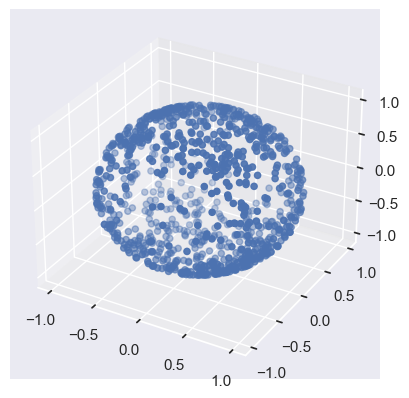

In [29]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [30]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [31]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [32]:
data_tf = binarizer.fit_transform(X)

In [33]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [34]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [115]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [37]:
df.Income.unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [35]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [117]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [118]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [120]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [121]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [122]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [123]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [124]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean', axis=1)

In [125]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [5]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [6]:
from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures transformer with degree 2
# This will allow us to generate polynomial features by considering interactions
# up to the second degree, which can capture non-linear relationships in the data.
pol = PolynomialFeatures(degree=2)

In [7]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [129]:
from sklearn.preprocessing import FunctionTransformer

In [130]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [131]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [132]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [133]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [8]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [16]:

# Fit the CountVectorizer to the 'Text' data and transform it into a document-term matrix
# The resulting document-term matrix represents the frequency of words in the text data.
document_term_matrix = cv.fit_transform(df.Text).toarray()

In [17]:
# Access the learned vocabulary from the CountVectorizer
vocabulary = cv.vocabulary_

In [18]:
# Create an instance of the CountVectorizer with specified stop words
# Stop words 'the' and 'is' will be ignored during the text-to-matrix conversion.
cv = CountVectorizer(stop_words=['the', 'is'])

# Fit the CountVectorizer to the 'Text' data and transform it into a document-term matrix
# The resulting document-term matrix represents the frequency of words in the text data.
document_term_matrix = cv.fit_transform(df.Text).toarray()

In [19]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [20]:
# Create an instance of the CountVectorizer with a custom vocabulary
# Only the words 'mission', 'food', and 'second' will be considered during text-to-matrix conversion.
cv = CountVectorizer(vocabulary=['mission', 'food', 'second'])

# Fit the CountVectorizer to the 'Text' data and transform it into a document-term matrix
# The resulting document-term matrix represents the frequency of the specified words in the text data.
document_term_matrix = cv.fit_transform(df.Text).toarray()

In [26]:

# Create an instance of the CountVectorizer with specified ngram range
# Ngrams of both single words and pairs of words (bigrams) will be considered during text-to-matrix conversion.
# eg "not good " "not"
cv = CountVectorizer(ngram_range=(1, 2))

# Fit the CountVectorizer to the 'Text' data and transform it into a document-term matrix
# The resulting document-term matrix represents the frequency of single words and word pairs in the text data.
document_term_matrix = cv.fit_transform(df.Text).toarray()



In [27]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create an instance of the TfidfVectorizer with specified stop words
# Stop words in English will be ignored during the TF-IDF transformation.
vectorizer = TfidfVectorizer(stop_words='english')

In [32]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [35]:
vectorizer.get_feature_names_out()

array(['awesome', 'document', 'food', 'impossible', 'mission', 'second'],
      dtype=object)

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer
#! for too large data
# Create an instance of the HashingVectorizer with specified number of features
# The hashing trick will be applied to transform text data into a fixed-dimensional vector space.
hv = HashingVectorizer(n_features=5)

In [37]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install scikit-image'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [43]:
from skimage.io import imread,imshow

In [44]:
image = imread('image.png')

In [45]:
image.shape

(773, 915, 3)

In [46]:
image[0]

array([[19, 18, 21],
       [19, 18, 21],
       [19, 18, 21],
       ...,
       [20, 18, 21],
       [20, 18, 21],
       [20, 18, 21]], dtype=uint8)

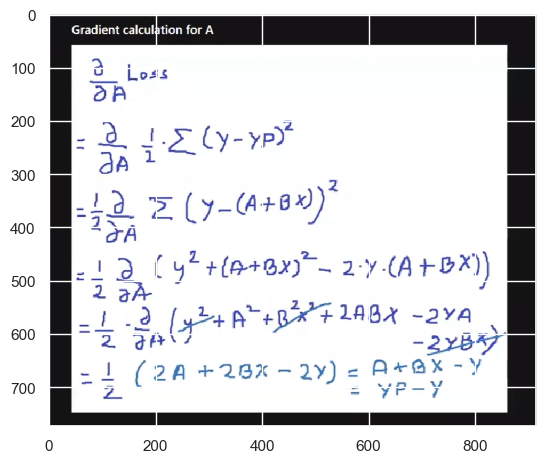

In [47]:
imshow(image)

In [48]:
from skimage.color import rgb2gray

In [49]:
rgb2gray(image).shape

(773, 915)

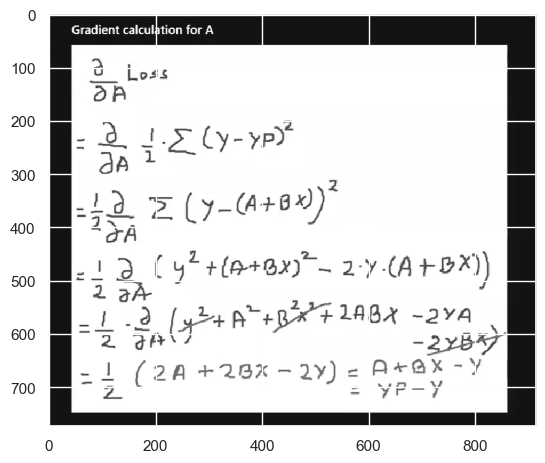

In [50]:
imshow(rgb2gray(image))

In [51]:
from skimage.transform import resize

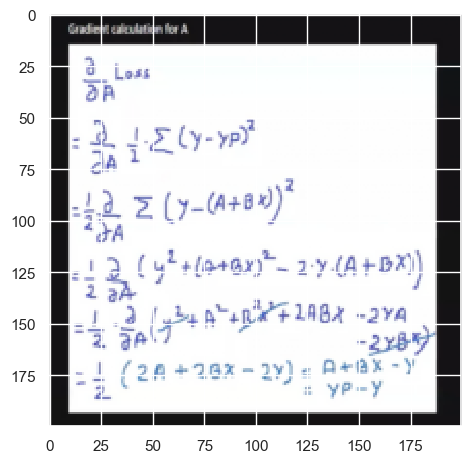

In [52]:
imshow(resize(image, (200,200)))